In [1]:
from utils import *

import matplotlib.pyplot as plt 

In [2]:
db_models, benchmarks = load_database()
cacheasso_benchmarks = benchmarks['cacheasso_benchmarks']
cachesize_benchmarks_small = benchmarks['cachesize_benchmarks_small']
cachesize_benchmarks_large = benchmarks['cachesize_benchmarks_large']
tlb_benchmarks = benchmarks['tlb_benchmarks']
singleperf = benchmarks['singleperf_benchmarks']
multiperf = benchmarks['multiperf_benchmarks']
cores = benchmarks['cores']
execution_times = benchmarks['execution_times']
memory_latencies = benchmarks['memory_latencies']
loadbuffer_benchmarks = benchmarks['loadbuffer_benchmarks']

[-]  Loading from sqlite3 database
[-]  Loaded data from databases in 17.71069312095642 seconds
[-]  Eliminated 0 Entries
[-]  Starting Pickle
[-]  Pickle done


In [3]:
csv_dict = load_csv()

[-]  Loading target data from CSV
[-]  Done loading target data from CSV


### Cache Sizes

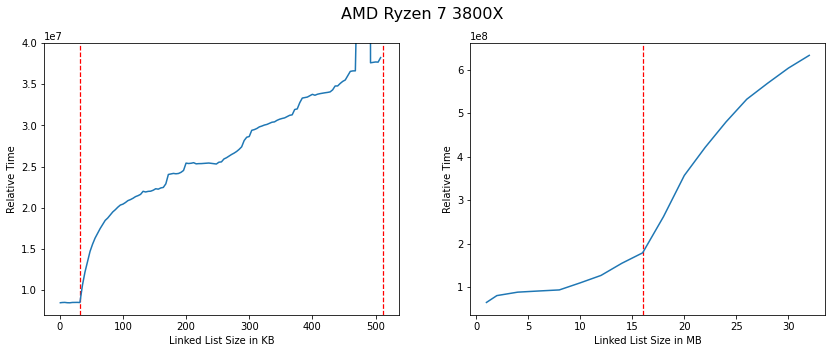

In [4]:
for i, model in enumerate(db_models):
    if "AMD Ryzen 7 3800X" in model:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
        fig.suptitle(model, fontsize=16)

        ax1.set_ylim([7000000, 40000000])
        ax1.set_xlabel("Linked List Size in KB")
        ax1.set_ylabel("Relative Time")
        X, Y = [], []
        for d in cachesize_benchmarks_small[i]:
            X += [d['x'] / 1024]
            Y += [d['y']]
        for line in [32, 512]:
            ax1.axvline(line, color='red', ls='--', lw=1.25)
        ax1.plot(X, Y)

        # large
        ax2.set_xlabel("Linked List Size in MB")
        ax2.set_ylabel("Relative Time")
        X, Y = [], []
        for d in cachesize_benchmarks_large[i]:
            X += [d['x'] / (1024 * 1024)]
            Y += [d['y']]
        for line in [16]:
            ax2.axvline(line, color='red', ls='--', lw=1.25)
        ax2.plot(X, Y)
        break

### L1 Cache Associativity

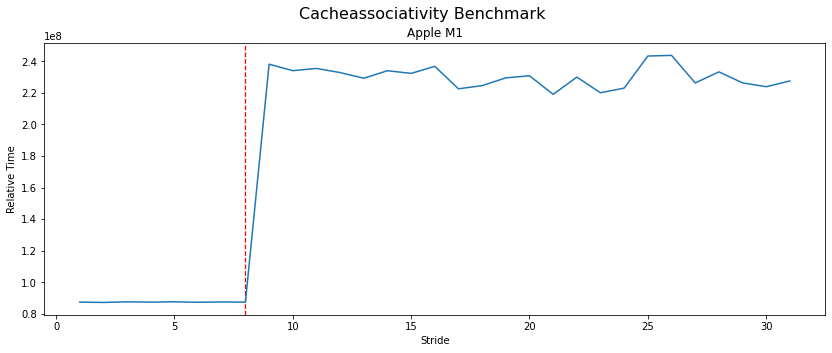

In [12]:
fig, ax = plt.subplots(figsize=(14, 5))
fig.suptitle("Cacheassociativity Benchmark", fontsize=16)

# Apple M1
model = db_models[81]
ax.set_title(model)
ax.set_xlabel("Stride")
ax.set_ylabel("Relative Time")
X, Y = [], []
for d in cacheasso_benchmarks[81]:
    X += [d['x']]
    Y += [d['y']]
ax.axvline(8, color='red', ls='--', lw=1.25)
ax.plot(X, Y)

### TLB Size

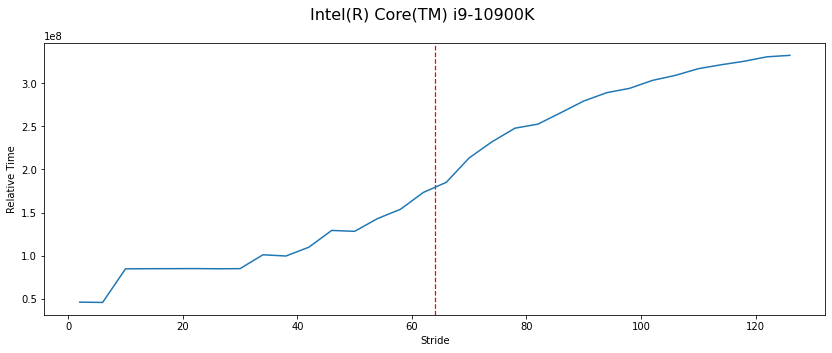

In [6]:
for i, model in enumerate(db_models):
    if "10900K" in model:
        fig, ax = plt.subplots(figsize=(14, 5))
        fig.suptitle(model, fontsize=16)
        
        ax.set_xlabel("Stride")
        ax.set_ylabel("Relative Time")
        X, Y = [], []
        for d in tlb_benchmarks[i]:
            X += [d['x']]
            Y += [d['y']]
        ax.axvline(64, color='red', ls='--', lw=1.25)
        ax.plot(X, Y)
        break

### Cores

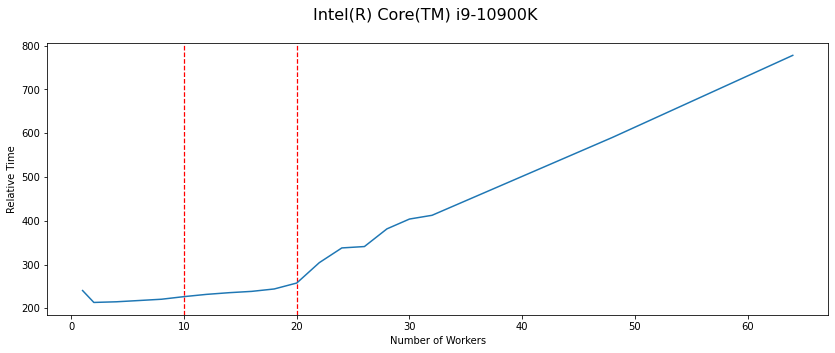

In [7]:
for i, model in enumerate(db_models):
    if "10900K" in model:
        fig, ax = plt.subplots(figsize=(14, 5))
        fig.suptitle(model, fontsize=16)
        
        ax.set_xlabel("Number of Workers")
        ax.set_ylabel("Relative Time")
        X, Y = [], []
        for d in cores[i]:
            X += [d['x']]
            Y += [d['y']]
        ax.axvline(10, color='red', ls='--', lw=1.25)
        ax.axvline(20, color='red', ls='--', lw=1.25)
        ax.plot(X, Y)
        break

### Loadbuffer

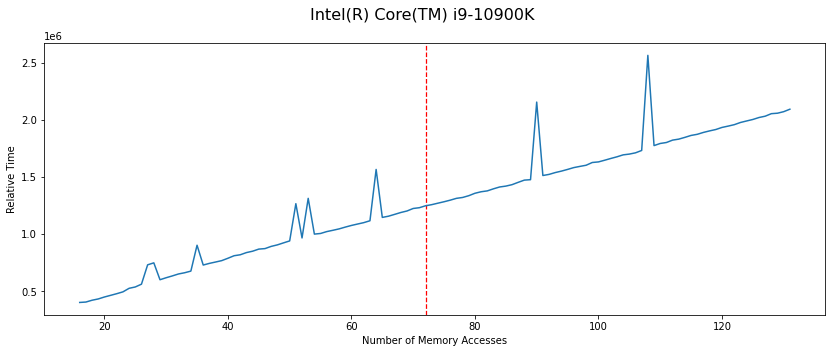

In [8]:
for i, model in enumerate(db_models):
    if "10900K" in model:
        fig, ax = plt.subplots(figsize=(14, 5))
        fig.suptitle(model, fontsize=16)
        
        ax.set_xlabel("Number of Memory Accesses")
        ax.set_ylabel("Relative Time")
        X, Y = [], []
        for d in loadbuffer_benchmarks[i]:
            X += [d['x']]
            Y += [d['y']]
        ax.axvline(72, color='red', ls='--', lw=1.25)
        ax.plot(X, Y)
        break

### Memory Latencies

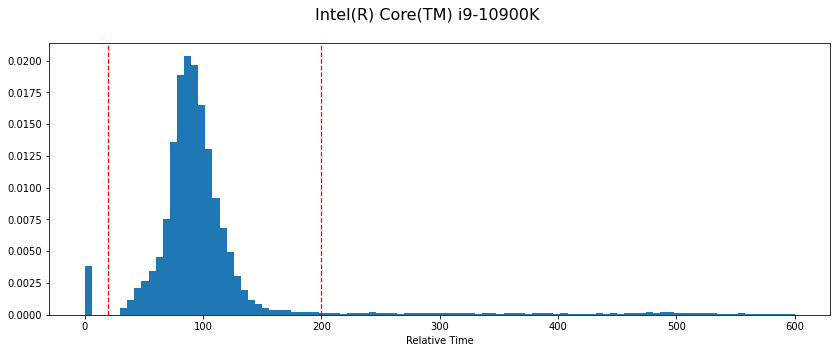

In [9]:
for i, model in enumerate(db_models):
    if "10900K" in model:
        fig, ax = plt.subplots(figsize=(14, 5))
        fig.suptitle(model, fontsize=16)
        
        ax.set_xlabel("Relative Time")
        ax.axvline(20, color='red', ls='--', lw=1.25)
        ax.axvline(200, color='red', ls='--', lw=1.25)
        ax.hist(memory_latencies[i], range=[0, 600], density=True, bins=100)
        break

### Single-Core Performance

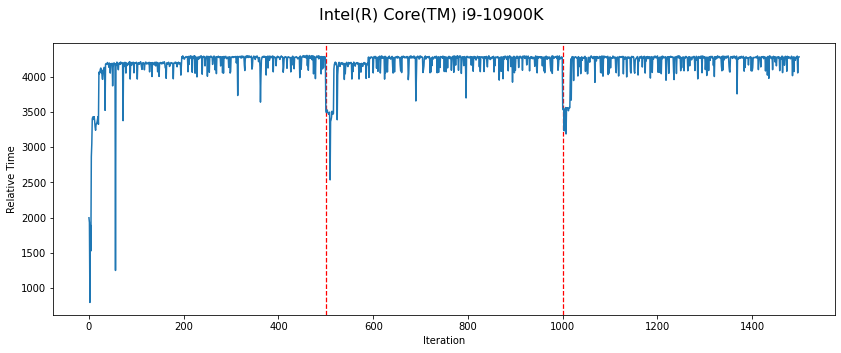

In [10]:
for i, model in enumerate(db_models):
    if "10900K" in model:
        fig, ax = plt.subplots(figsize=(14, 5))
        fig.suptitle(model, fontsize=16)
        
        ax.set_xlabel("Iteration")
        ax.set_ylabel("Relative Time")
        X, Y = [], []
        for d in singleperf[i]:
            X += [d['x']]
            Y += [d['y']]
        ax.axvline(500, color='red', ls='--', lw=1.25)
        ax.axvline(1000, color='red', ls='--', lw=1.25)
        ax.plot(X, Y)
        break

### Multi-Core Performance

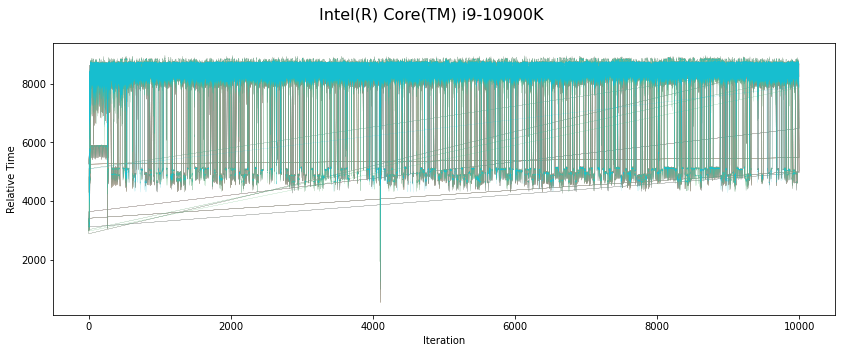

In [11]:
for i, model in enumerate(db_models):
    if "10900K" in model:
        fig, ax = plt.subplots(figsize=(14, 5))
        fig.suptitle(model, fontsize=16)
        
        ax.set_xlabel("Iteration")
        ax.set_ylabel("Relative Time")
        X, Y = [], []
        for line in multiperf[i]:
            for d in line:
                X += [d['x']]
                Y += [d['y']]
            ax.plot(X, Y, lw=0.1)
        break